# Graphical and Data messing around

In [1]:
import numpy as np
import pandas as pd

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    set_table_attributes('style="font-size: 10px"')

,A,B,C,D,E
0,1.000000,1.329212,nan,-0.316280,-0.990810
1,2.000000,-1.070816,-1.438713,0.564417,0.295722
2,3.000000,-1.626404,0.219565,0.678805,1.889273
3,4.000000,0.961538,0.104011,nan,0.850229
4,5.000000,1.453425,1.057737,0.165562,0.515018
5,6.000000,-1.336936,0.562861,1.392855,-0.063328
6,7.000000,0.121668,1.207603,-0.002040,1.627796
7,8.000000,0.354493,1.037528,-0.385684,0.519818
8,9.000000,1.686583,-1.325963,1.428984,-2.089354
9,10.000000,-0.129820,0.631523,-0.586538,0.290720


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

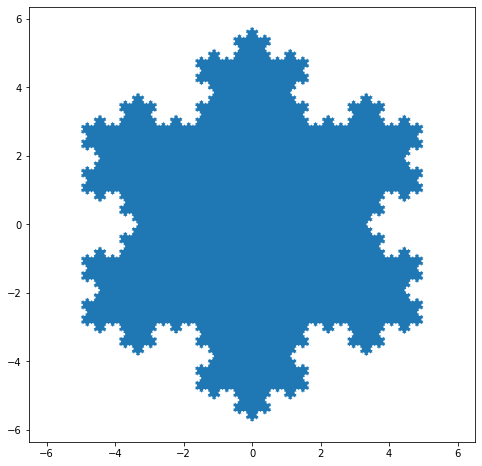

In [3]:
x, y = koch_snowflake(order=5)
plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()


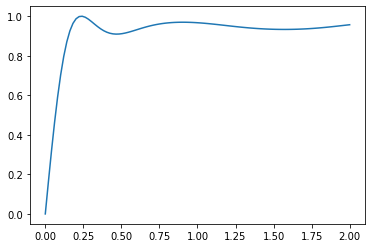

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100)
# y = np.linspace(2,0,100)
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, np.sin(2*np.sin(2*np.sin(2*np.sin(x)))), label='quadratic')

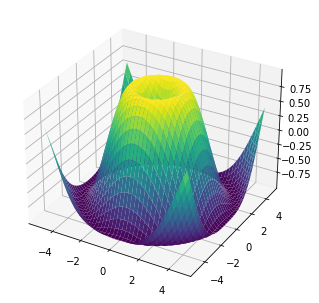

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()